Explore the variables: Manufacturer, Screen_Size_cm, Price
Compute in Python the measures of relative location, dispersion, and shape that make sense for each of these variables.
Justify whether there is any relationship between the variable Price and any of the other variables.
Create graphical representations of the distribution of each variable, and of the correlation between Screen_Size_cm and Price.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

path = '/content/laptop_pricing (1).csv'
Laptop = pd.read_csv(path)

print(Laptop.head())

print(Laptop.info())


  Manufacturer  Category     Screen  GPU  OS  CPU_core  Screen_Size_cm  \
0         Acer         4  IPS Panel    2   1         5          35.560   
1         Dell         3    Full HD    1   1         3          39.624   
2         Dell         3    Full HD    1   1         7          39.624   
3         Dell         4  IPS Panel    2   1         5          33.782   
4           HP         4    Full HD    2   1         7          39.624   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            1.6       8             256       1.60    978  
1            2.0       4             256       2.20    634  
2            2.7       8             256       2.20    946  
3            1.6       8             128       1.22   1244  
4            1.8       8             256       1.91    837  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  --

In [16]:
print(Laptop.describe())

         Category         GPU          OS    CPU_core  Screen_Size_cm  \
count  238.000000  238.000000  238.000000  238.000000      234.000000   
mean     3.205882    2.151261    1.058824    5.630252       37.269615   
std      0.776533    0.638282    0.235790    1.241787        2.971365   
min      1.000000    1.000000    1.000000    3.000000       30.480000   
25%      3.000000    2.000000    1.000000    5.000000       35.560000   
50%      3.000000    2.000000    1.000000    5.000000       38.100000   
75%      4.000000    3.000000    1.000000    7.000000       39.624000   
max      5.000000    3.000000    2.000000    7.000000       43.942000   

       CPU_frequency      RAM_GB  Storage_GB_SSD   Weight_kg        Price  
count     238.000000  238.000000      238.000000  233.000000   238.000000  
mean        2.360084    7.882353      245.781513    1.862232  1462.344538  
std         0.411393    2.482603       34.765316    0.494332   574.607699  
min         1.200000    4.000000      

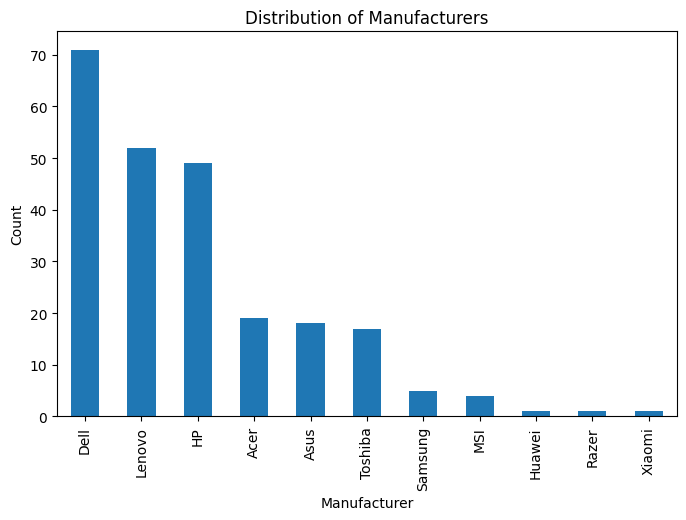

In [14]:
# ----------------------------------------
# 3. Analysis of 'Manufacturer'
# ----------------------------------------

# Frequency count
manufacturer_counts = Laptop['Manufacturer'].value_counts()
manufacturer_counts

# Plot bar chart
plt.figure(figsize=(8,5))
manufacturer_counts.plot(kind='bar')
plt.title('Distribution of Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()


In [15]:
# ----------------------------------------
# 3. Analysis of 'Screen_Size_cm'
# ----------------------------------------

# Central tendency
screen_mean = Laptop['Screen_Size_cm'].mean()
screen_median = Laptop['Screen_Size_cm'].median()
screen_mode = Laptop['Screen_Size_cm'].mode().values[0]

# Dispersion
screen_std = Laptop['Screen_Size_cm'].std()
screen_var = Laptop['Screen_Size_cm'].var()
screen_range = Laptop['Screen_Size_cm'].max() - Laptop['Screen_Size_cm'].min()
screen_iqr = Laptop['Screen_Size_cm'].quantile(0.75) - Laptop['Screen_Size_cm'].quantile(0.25)

# Shape
screen_skew = Laptop['Screen_Size_cm'].skew()
screen_kurt = Laptop['Screen_Size_cm'].kurt()

print(f"Screen Size (cm): mean={screen_mean:.2f}, median={screen_median}, mode={screen_mode}")
print(f"Std={screen_std:.2f}, Var={screen_var:.2f}, Range={screen_range:.2f}, IQR={screen_iqr:.2f}")
print(f"Skewness={screen_skew:.2f}, Kurtosis={screen_kurt:.2f}")



Screen Size (cm): mean=37.27, median=38.1, mode=39.624
Std=2.97, Var=8.83, Range=13.46, IQR=4.06
Skewness=-0.03, Kurtosis=-0.54


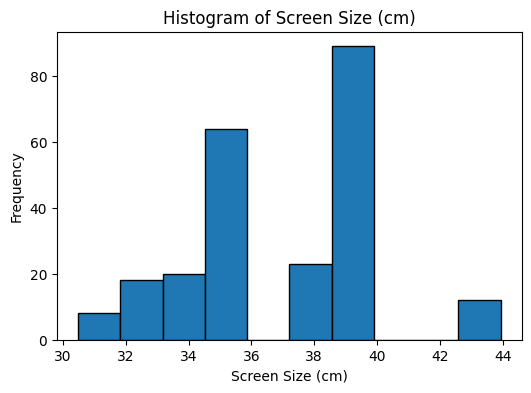

In [17]:
# Plot Histogram
plt.figure(figsize=(6,4))
plt.hist(Laptop['Screen_Size_cm'], bins=10, edgecolor='black')
plt.title('Histogram of Screen Size (cm)')
plt.xlabel('Screen Size (cm)')
plt.ylabel('Frequency')
plt.show()



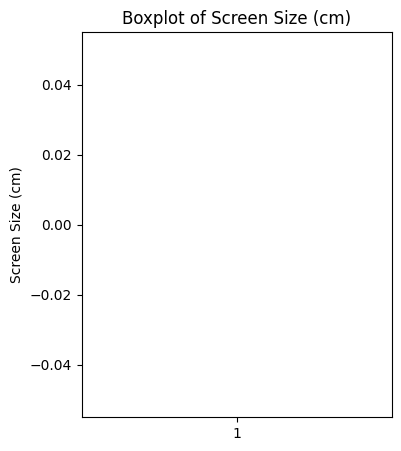

In [18]:
# Plot Boxplot
plt.figure(figsize=(4,5))
plt.boxplot(Laptop['Screen_Size_cm'])
plt.title('Boxplot of Screen Size (cm)')
plt.ylabel('Screen Size (cm)')
plt.show()

In [19]:
# ----------------------------------------
# 5. Analysis of 'Price'
# ----------------------------------------

# Central tendency
price_mean = Laptop['Price'].mean()
price_median = Laptop['Price'].median()
price_mode = Laptop['Price'].mode().values[0]

# Dispersion
price_std = Laptop['Price'].std()
price_var = Laptop['Price'].var()
price_range = Laptop['Price'].max() - Laptop['Price'].min()
price_iqr = Laptop['Price'].quantile(0.75) - Laptop['Price'].quantile(0.25)

# Shape
price_skew = Laptop['Price'].skew()
price_kurt = Laptop['Price'].kurt()

print(f"Price: mean={price_mean:.2f}, median={price_median}, mode={price_mode}")
print(f"Std={price_std:.2f}, Var={price_var:.2f}, Range={price_range:.2f}, IQR={price_iqr:.2f}")
print(f"Skewness={price_skew:.2f}, Kurtosis={price_kurt:.2f}")

Price: mean=1462.34, median=1333.0, mode=888
Std=574.61, Var=330174.01, Range=3283.00, IQR=710.50
Skewness=1.27, Kurtosis=2.45


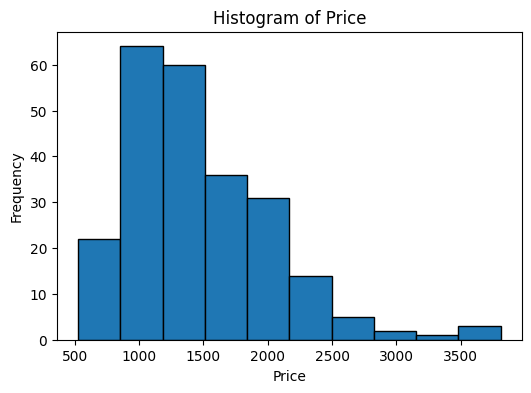

In [21]:
# Plot Histogram
plt.figure(figsize=(6,4))
plt.hist(Laptop['Price'], bins=10, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

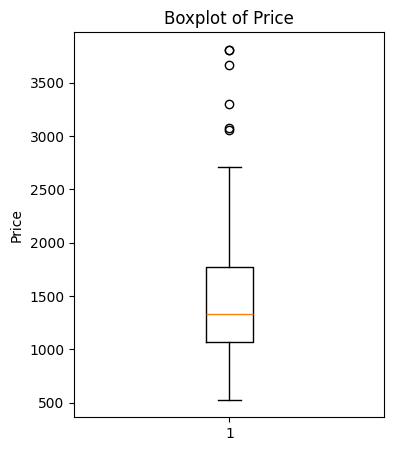

In [22]:
# Plot Boxplot
plt.figure(figsize=(4,5))
plt.boxplot(Laptop['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

In [23]:
# ----------------------------------------
# 6. Relationship between Price and Manufacturer
# ----------------------------------------
manufacturer_price_mean = Laptop.groupby('Manufacturer')['Price'].mean()
print("Mean Price by Manufacturer:\n", manufacturer_price_mean)


Mean Price by Manufacturer:
 Manufacturer
Acer       1067.157895
Asus       1327.111111
Dell       1495.084507
HP         1399.285714
Huawei     1714.000000
Lenovo     1493.096154
MSI        1452.750000
Razer      3301.000000
Samsung    2107.400000
Toshiba    1703.882353
Xiaomi     1188.000000
Name: Price, dtype: float64


<Figure size 1000x500 with 0 Axes>

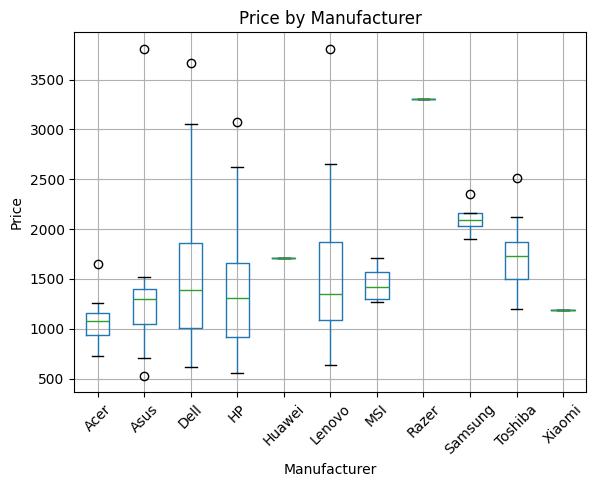

In [24]:
# Boxplot
plt.figure(figsize=(10,5))
Laptop.boxplot(column='Price', by='Manufacturer')
plt.title('Price by Manufacturer')
plt.suptitle('')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [25]:
# ----------------------------------------
# 7. Relationship between Screen_Size_cm and Price
# ----------------------------------------

# Correlation
corr = Laptop['Screen_Size_cm'].corr(Laptop['Price'])
print(f"Correlation between Screen Size and Price: {corr:.2f}")

Correlation between Screen Size and Price: -0.13


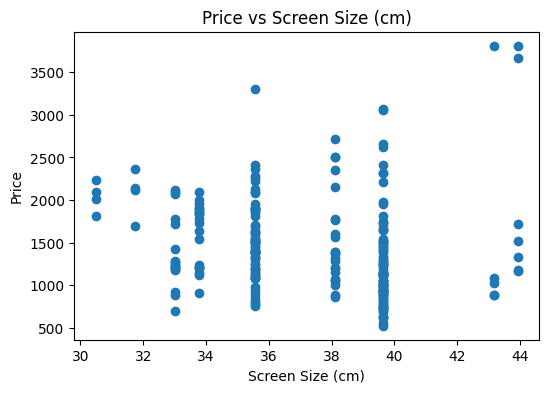

In [27]:
# Scatterplot
plt.figure(figsize=(6,4))
plt.scatter(Laptop['Screen_Size_cm'], Laptop['Price'])
plt.title('Price vs Screen Size (cm)')
plt.xlabel('Screen Size (cm)')
plt.ylabel('Price')
plt.show()